In [174]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [175]:
df = pd.read_csv(r"C:\Users\user\Downloads\train.csv")
df # data 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [176]:
df = df.head(10000)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1001530,P00151742,M,26-35,4,A,1,1,8,15.0,16.0,7967
9996,1001530,P00119742,M,26-35,4,A,1,1,5,8.0,12.0,8590
9997,1001530,P00178842,M,26-35,4,A,1,1,2,4.0,9.0,13147
9998,1001530,P00124842,M,26-35,4,A,1,1,11,NaN,NaN,5975


In [177]:
df.shape

(10000, 12)

In [178]:
df.size

120000

In [179]:
df.info() # information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10000 non-null  int64  
 1   Product_ID                  10000 non-null  object 
 2   Gender                      10000 non-null  object 
 3   Age                         10000 non-null  object 
 4   Occupation                  10000 non-null  int64  
 5   City_Category               10000 non-null  object 
 6   Stay_In_Current_City_Years  10000 non-null  object 
 7   Marital_Status              10000 non-null  int64  
 8   Product_Category_1          10000 non-null  int64  
 9   Product_Category_2          6757 non-null   float64
 10  Product_Category_3          2997 non-null   float64
 11  Purchase                    10000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 937.6+ KB


In [180]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,1.000791e+06,8.433700,0.405300,5.292800,9.796359,12.811144,9152.487700
std,4.402229e+02,6.660333,0.490975,3.660739,5.055550,4.057049,4881.543001
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.000403e+06,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,1.000817e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8021.500000
75%,1.001172e+06,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,1.001530e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [181]:
df.dtypes # data type of each column 

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [182]:
df.isna().sum() # cheking null values 

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3243
Product_Category_3            7003
Purchase                         0
dtype: int64

In [183]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
        'Product_Category_2', 'Product_Category_3', 'Purchase'],
       dtype='object')]

## Allthe columns except Product_Category_2  , Product_Category_3  dosentnt contain null values 

In [184]:
# most of the roes in both column are empty then there is point of filling them because it will dissrupt the data trend so delete the useless column 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,446,0,0,10,0,2,0,3,8370
1,1000001,1545,0,0,10,0,2,0,1,15200
2,1000001,549,0,0,10,0,2,0,12,1422
3,1000001,530,0,0,10,0,2,0,12,1057
4,1000002,1772,1,6,16,2,4,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
9995,1001530,923,1,2,4,0,1,1,8,7967
9996,1001530,733,1,2,4,0,1,1,5,8590
9997,1001530,1082,1,2,4,0,1,1,2,13147
9998,1001530,767,1,2,4,0,1,1,11,5975


In [186]:
df.isna().sum() # cheking null values 

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [187]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [278]:
df.dtypes

User_ID                       int64
Product_ID                    int32
Gender                        int64
Age                           int32
Occupation                    int64
City_Category                 int32
Stay_In_Current_City_Years    int32
Marital_Status                int64
Product_Category_1            int64
Purchase                      int64
dtype: object

In [189]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
        'Purchase'],
       dtype='object')]

''' numericals column are User_ID', 'Product_ID', 'Age' , 'Purchase' ''''

# # their are only 1 numericals columns 

In [264]:
def numerical_parameter_check (col) :
    print(f"mean of {col} : {df[col].mean()}")
    print(f"mode of {col} : {df[col].mode()[0]}")
    print(f"median of {col} : {df[col].median()}")
    print(f"var of {col} : {df[col].var()}")
    print(f"std of {col} : {df[col].std()}")
    print(f"median of {col} : {df[col].median()}")
    print(f"skew of {col} : {df[col].skew()}")
    print(f"\nzscore of {col} : {zscore(df[col])}")

In [267]:
numerical_parameter_check('Purchase')

mean of Purchase : 9142.3088
mode of Purchase : 21058
median of Purchase : 8021.5
var of Purchase : 23562693.54519693
std of Purchase : 4854.141895865523
median of Purchase : 8021.5
skew of Purchase : 0.6218016340244392

zscore of Purchase : 0      -0.159111
1       1.248005
2      -1.590538
3      -1.665735
4      -0.241725
          ...   
9995   -0.242137
9996   -0.113787
9997    0.825046
9998   -0.652529
9999   -0.100807
Name: Purchase, Length: 10000, dtype: float64


In [192]:
def graph_numerical(col):
    print(f"{col} : Outliers Checking") 
    sns.boxplot(df[col], color = "orange")
    plt.show()

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr  = q3 - q1

    LowerTail = q1 - 1.5 * iqr
    UpperTail = q3 + 1.5 * iqr

    print(f"IQR = {iqr}")
    print(f"Lower Tail = {LowerTail}")
    print(f"Upper Tail = {UpperTail}")

Purchase : Outliers Checking


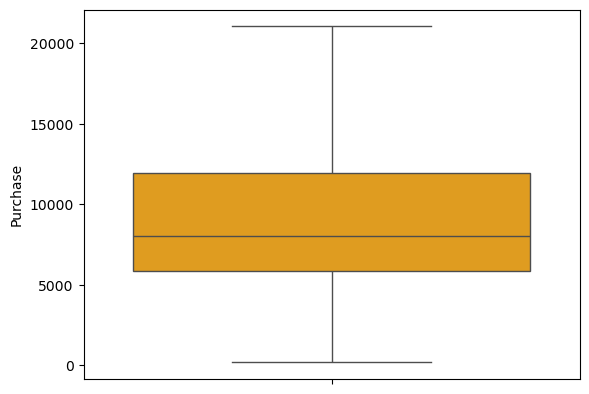

IQR = 6090.5
Lower Tail = -3304.0
Upper Tail = 21058.0


In [268]:

graph_numerical('Purchase')

## we have to handle otlier from purchase 

In [194]:
# here we see that bmi contain outlier now we have to handle them 
def outlier_handling (col) :
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr  = q3 - q1

    LowerTail = q1 - 1.5 * iqr
    UpperTail = q3 + 1.5 * iqr

    print(f"IQR = {iqr}")
    print(f"Lower Tail = {LowerTail}")
    print(f"Upper Tail = {UpperTail}")
    print("-"*80)


    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print(f"\nOutliers of {col}")

    df.loc[(df[col] < LowerTail), col] = LowerTail
    df.loc[(df[col] > UpperTail), col] = UpperTail

In [195]:
outlier_handling('Purchase')

IQR = 6090.5
Lower Tail = -3304.0
Upper Tail = 21058.0
--------------------------------------------------------------------------------

Outliers of Purchase


<Axes: xlabel='Purchase'>

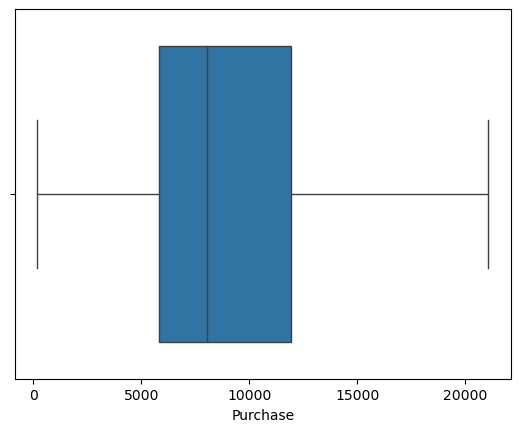

In [196]:
sns.boxplot( df , x = 'Purchase') #@ outlier are deleted now 

## Univariant Analysis

In [259]:
def Univarinat_plot(col): # here we done univariant analysis by plotting histplot , boxplot , violinplot , kdeplot 
    sns.histplot(df[col], bins=20, kde=True, color = "red") 
    plt.title(f" histplot of {col}")
    plt.show()
    sns.boxplot(x=df[col], color = "pink")
    plt.title(f" boxplot of {col}")
    plt.show()
    sns.violinplot(x=df[col],color = "purple")
    plt.title(f" violinplot of {col}")
    plt.show()
   
    sns.kdeplot( data = df , x = df[col], fill=True, color="black")
    plt.title(f" kdeplot of {col}")
    plt.show()

User_ID


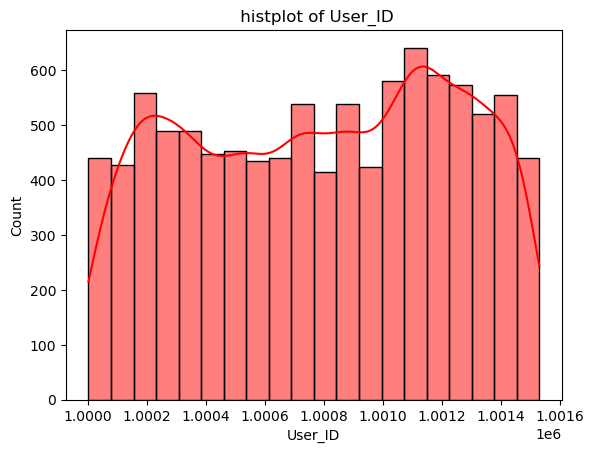

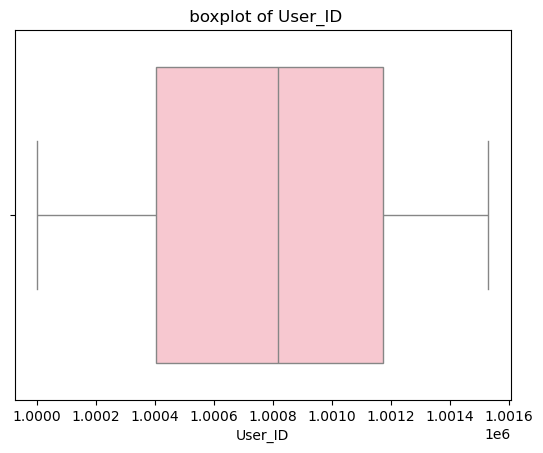

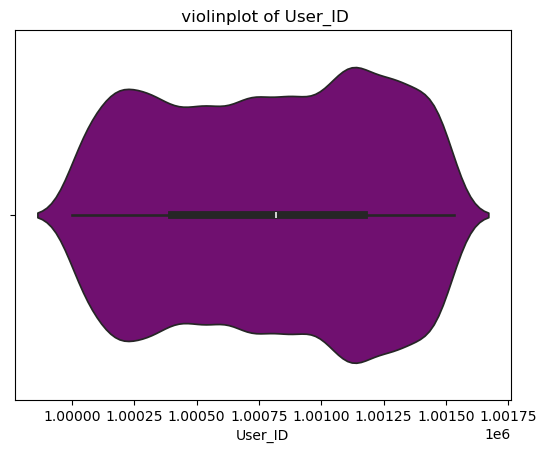

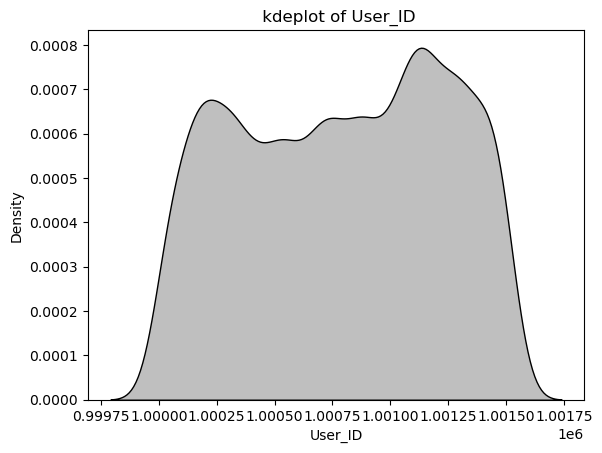

#####################################################################################################################################################
Purchase


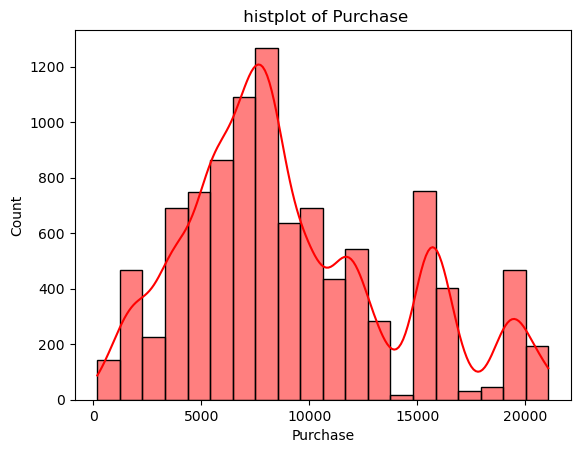

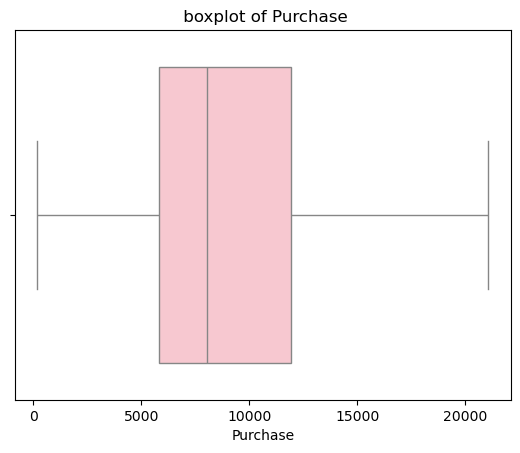

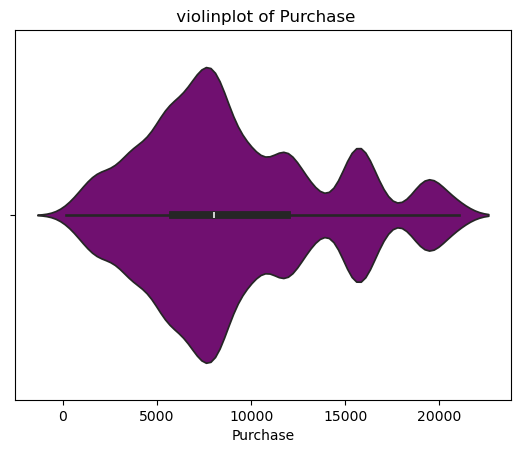

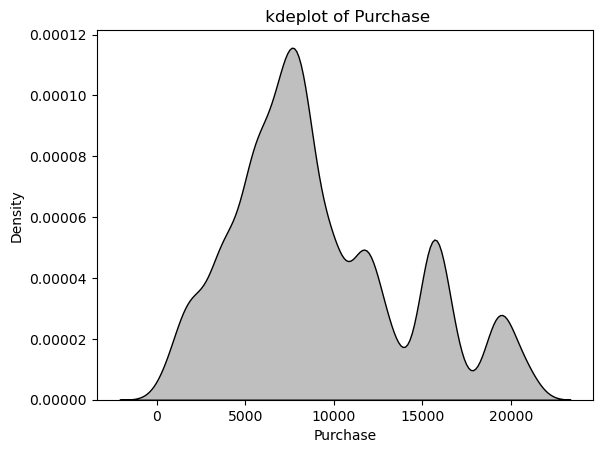

#####################################################################################################################################################


In [260]:
column = ('User_ID', 'Purchase')
for col in column :
    print(col)
    Univarinat_plot(col)
    print("#"*149)

## categorical columns 

In [199]:
# categorical column  'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1'
 

In [200]:
# Product_ID column 

In [201]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00163542',
       'P00182842', 'P00293542'], dtype=object)

In [202]:
df['Product_ID'].nunique()

2303

In [203]:
df['Product_ID'].value_counts()

Product_ID
P00025442    35
P00112142    34
P00110742    31
P00265242    31
P00110942    30
             ..
P00333842     1
P00249342     1
P00354542     1
P00122342     1
P00293542     1
Name: count, Length: 2303, dtype: int64

In [204]:
# converting the categorical column to numerical

le = LabelEncoder()


df['Product_ID'] = le.fit_transform(df['Product_ID'])


In [205]:
df['Product_ID'].unique()

array([ 446, 1545,  549, ...,  994, 1115, 1818])

##  1.products purchase according to age groups 

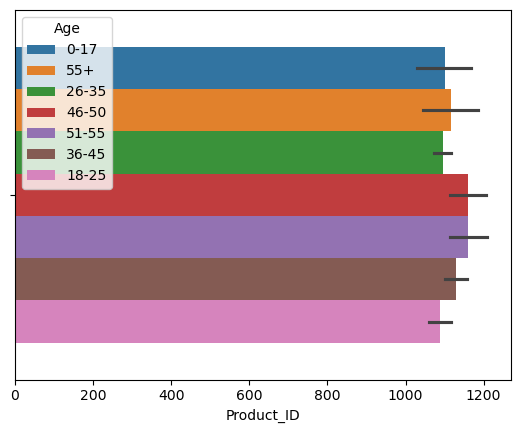

In [206]:
sns.barplot(data=df, x="Product_ID", hue="Age")
plt.show()

In [207]:
# Gender column

In [208]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [209]:
df['Gender'].nunique()


2

In [210]:
df['Gender'].value_counts()

Gender
M    7636
F    2364
Name: count, dtype: int64

In [211]:
df['Gender'] = df['Gender'].replace({"M":1 , "F":0} )

C:\Users\user\AppData\Local\Temp\ipykernel_7212\2748739240.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({"M":1 , "F":0} )


In [212]:
df['Gender'].value_counts()

Gender
1    7636
0    2364
Name: count, dtype: int64

## Genderwise Count of buying  product_category_1 product according to gender

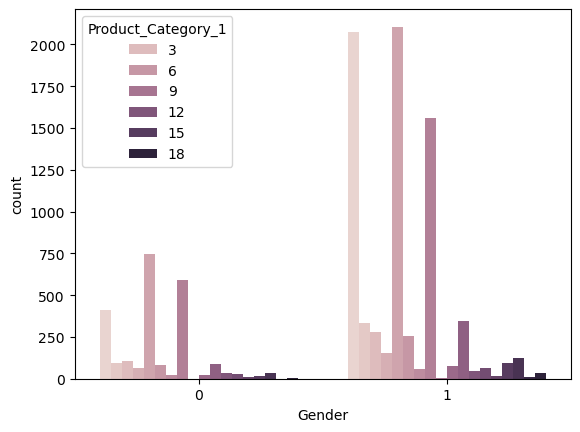

In [257]:
sns.countplot( df , x = 'Gender' , hue = 'Product_Category_1')
plt.show()

In [214]:
# Age column 

In [215]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [216]:
df['Age'].nunique()

7

In [217]:
df['Age'].value_counts()

Age
26-35    3776
18-25    2118
36-45    1961
46-50     752
51-55     690
0-17      378
55+       325
Name: count, dtype: int64

## Age group purchase according to city_category

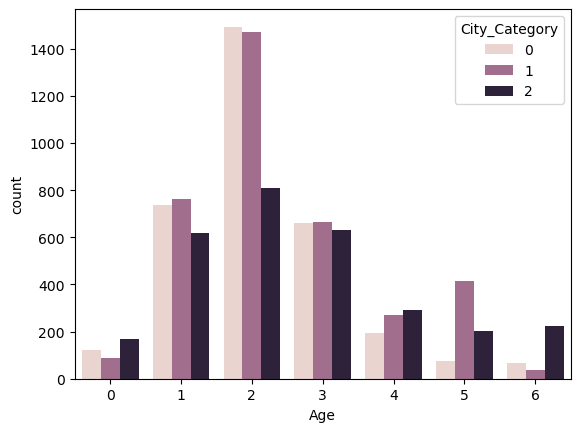

In [258]:
sns.countplot( df , x = 'Age' , hue = "City_Category"  )
plt.show()

In [219]:
# converting the categorical column to numerical

le = LabelEncoder()


df['Age'] = le.fit_transform(df['Age'])


In [220]:
# 'Occupation'

In [221]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [222]:
df['Occupation'].nunique()

21

In [223]:
df['Occupation'].value_counts()

Occupation
4     1248
0     1203
7      985
17     795
1      777
20     764
12     618
2      510
16     480
3      447
14     399
10     370
6      271
11     216
15     192
19     187
13     167
5      131
9      104
18      85
8       51
Name: count, dtype: int64

## Genderwise occupation of buyers

<Axes: xlabel='Occupation', ylabel='count'>

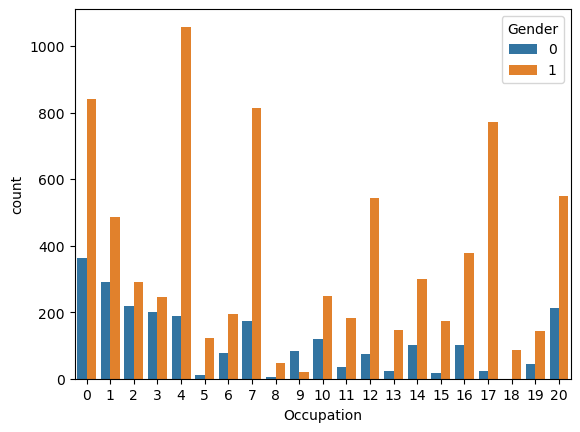

In [224]:
sns.countplot( df , x = 'Occupation' , hue = "Gender"  )

In [225]:
# City_Category column 

In [226]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [227]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [228]:
df["City_Category"].nunique()

3

In [229]:
df["City_Category"].value_counts()

City_Category
B    3711
A    3346
C    2943
Name: count, dtype: int64

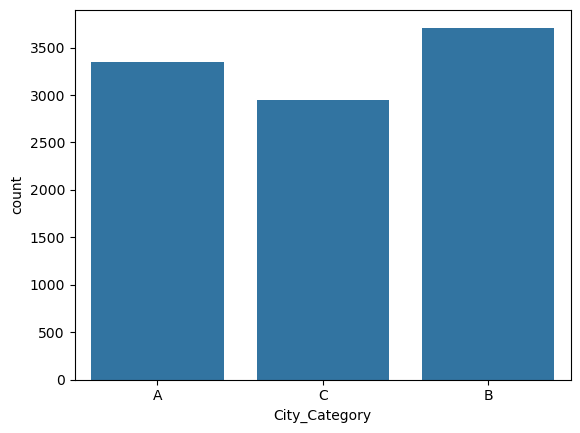

In [230]:
sns.countplot(df  , x = "City_Category")
plt.show()

In [231]:
# converting the categorical column to numerical

le = LabelEncoder()


df['City_Category'] = le.fit_transform(df['City_Category'])

In [232]:
#  column Stay_In_Current_City_Years

In [233]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [234]:
df["Stay_In_Current_City_Years"].nunique()

5

In [235]:
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     3190
3     1891
2     1770
4+    1684
0     1465
Name: count, dtype: int64

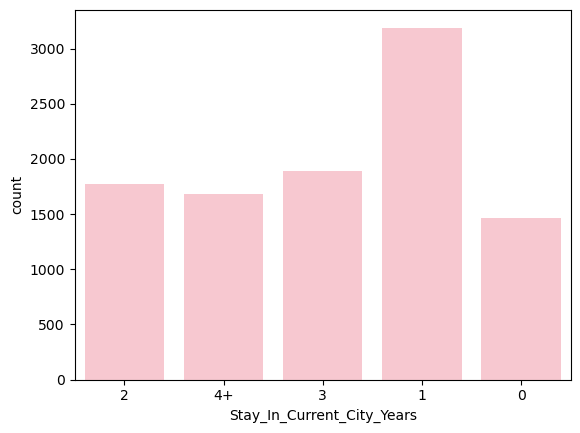

In [236]:
sns.countplot(df  , x = "Stay_In_Current_City_Years" ,  color = "pink")
plt.show()

## Division of buyers with Stay_In_Current_City_Years

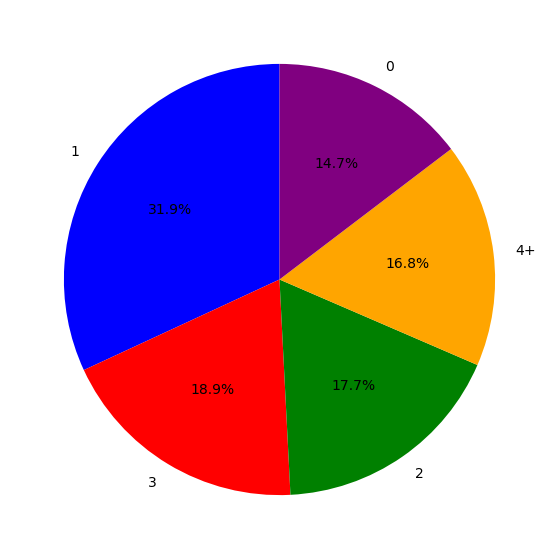

In [237]:

stay_counts = df["Stay_In_Current_City_Years"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(stay_counts, labels=stay_counts.index, autopct="%1.1f%%", startangle=90, colors=['blue', 'red', 'green', 'orange', 'purple'])
plt.show()

In [238]:
# converting the categorical column to numerical

le = LabelEncoder()


df['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'])

In [239]:
# Marital_Status column

In [240]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [241]:
df["Marital_Status"].nunique()

2

In [242]:
df["Marital_Status"].value_counts()

Marital_Status
0    5947
1    4053
Name: count, dtype: int64

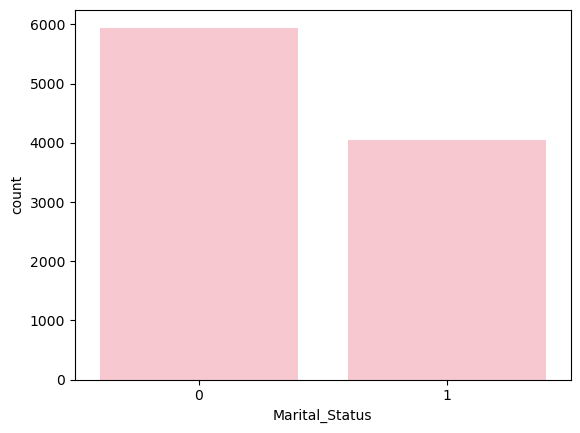

In [243]:
sns.countplot(df  , x = "Marital_Status" ,  color = "pink")
plt.show()

## Maritial status of buyers gender wise 

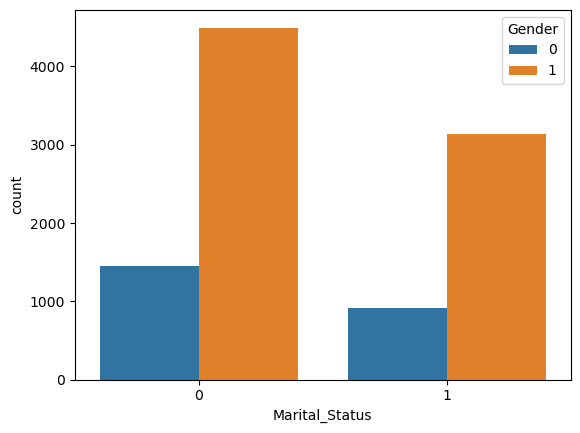

In [244]:
sns.countplot(df  , x = "Marital_Status"  , hue = "Gender")
plt.show()

In [245]:
# Product_Category_1 column 

In [246]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [247]:
df["Product_Category_1"].nunique()

18

In [248]:
df["Product_Category_1"].value_counts()

Product_Category_1
5     2851
1     2489
8     2149
11     438
2      426
3      389
6      340
4      217
16     158
15     110
10      98
13      90
12      80
7       76
18      43
14      27
17      13
9        6
Name: count, dtype: int64

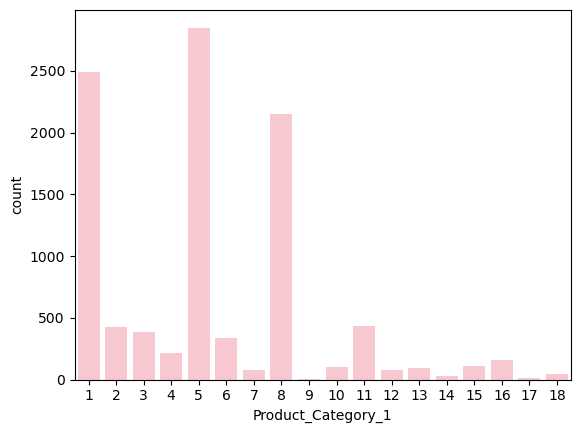

In [249]:
sns.countplot(df  , x = "Product_Category_1" ,  color = "pink")
plt.show()

## Product_Category_1 wise buyers according to gender 

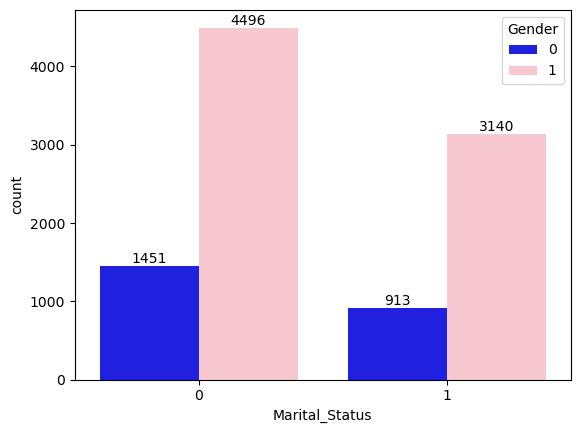

In [250]:

a = sns.countplot(data=df, x="Marital_Status", hue="Gender", palette=["blue", "pink"])
for bar in a.containers:
    ax.bar_label(bar)

In [253]:
df.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
User_ID,1.000000,0.009598,-0.005759,-0.018767,0.011987,-0.062634,0.014731,0.019161,0.020092,-0.039901
Product_ID,0.009598,1.000000,0.021914,0.031332,0.008506,0.015248,-0.001963,0.010395,0.020830,-0.089751
Gender,-0.005759,0.021914,1.000000,-0.004614,0.132995,-0.014939,0.091974,0.021635,-0.054706,0.068921
Age,-0.018767,0.031332,-0.004614,1.000000,0.116024,0.126883,0.025146,0.335784,0.069731,0.004549
Occupation,0.011987,0.008506,0.132995,0.116024,1.000000,0.042955,0.094785,-0.020515,-0.002038,0.003229
City_Category,-0.062634,0.015248,-0.014939,0.126883,0.042955,1.000000,0.035716,0.022975,-0.041322,0.086723
Stay_In_Current_City_Years,0.014731,-0.001963,0.091974,0.025146,0.094785,0.035716,1.000000,0.043902,-0.000389,0.011884
Marital_Status,0.019161,0.010395,0.021635,0.335784,-0.020515,0.022975,0.043902,1.000000,0.013426,-0.000242
Product_Category_1,0.020092,0.020830,-0.054706,0.069731,-0.002038,-0.041322,-0.000389,0.013426,1.000000,-0.323908
Purchase,-0.039901,-0.089751,0.068921,0.004549,0.003229,0.086723,0.011884,-0.000242,-0.323908,1.000000


In [254]:
df.cov()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
User_ID,193796.197147,2746.957379,-1.077167,-11.219168,35.147189,-21.838889,8.604191,4.141497,32.379027,-8.526424e+04
Product_ID,2746.957379,422677.838167,6.053352,27.662969,36.831092,7.851575,-1.693324,3.318034,49.574520,-2.832404e+05
Gender,-1.077167,6.053352,0.180533,-0.002662,0.376364,-0.005027,0.051851,0.004513,-0.085091,1.421494e+02
Age,-11.219168,27.662969,-0.002662,1.844189,1.049416,0.136476,0.045309,0.223883,0.346657,2.998718e+01
Occupation,35.147189,36.831092,0.376364,1.049416,44.360040,0.226601,0.837625,-0.067085,-0.049692,1.044051e+02
City_Category,-21.838889,7.851575,-0.005027,0.136476,0.226601,0.627339,0.037534,0.008934,-0.119812,3.334261e+02
Stay_In_Current_City_Years,8.604191,-1.693324,0.051851,0.045309,0.837625,0.037534,1.760463,0.028599,-0.001890,7.654064e+01
Marital_Status,4.141497,3.318034,0.004513,0.223883,-0.067085,0.008934,0.028599,0.241056,0.024131,-5.769143e-01
Product_Category_1,32.379027,49.574520,-0.085091,0.346657,-0.049692,-0.119812,-0.001890,0.024131,13.401008,-5.755763e+03
Purchase,-85264.241699,-283240.368402,142.149415,29.987183,104.405114,333.426087,76.540642,-0.576914,-5755.763493,2.356269e+07


## Multivarient Analysis

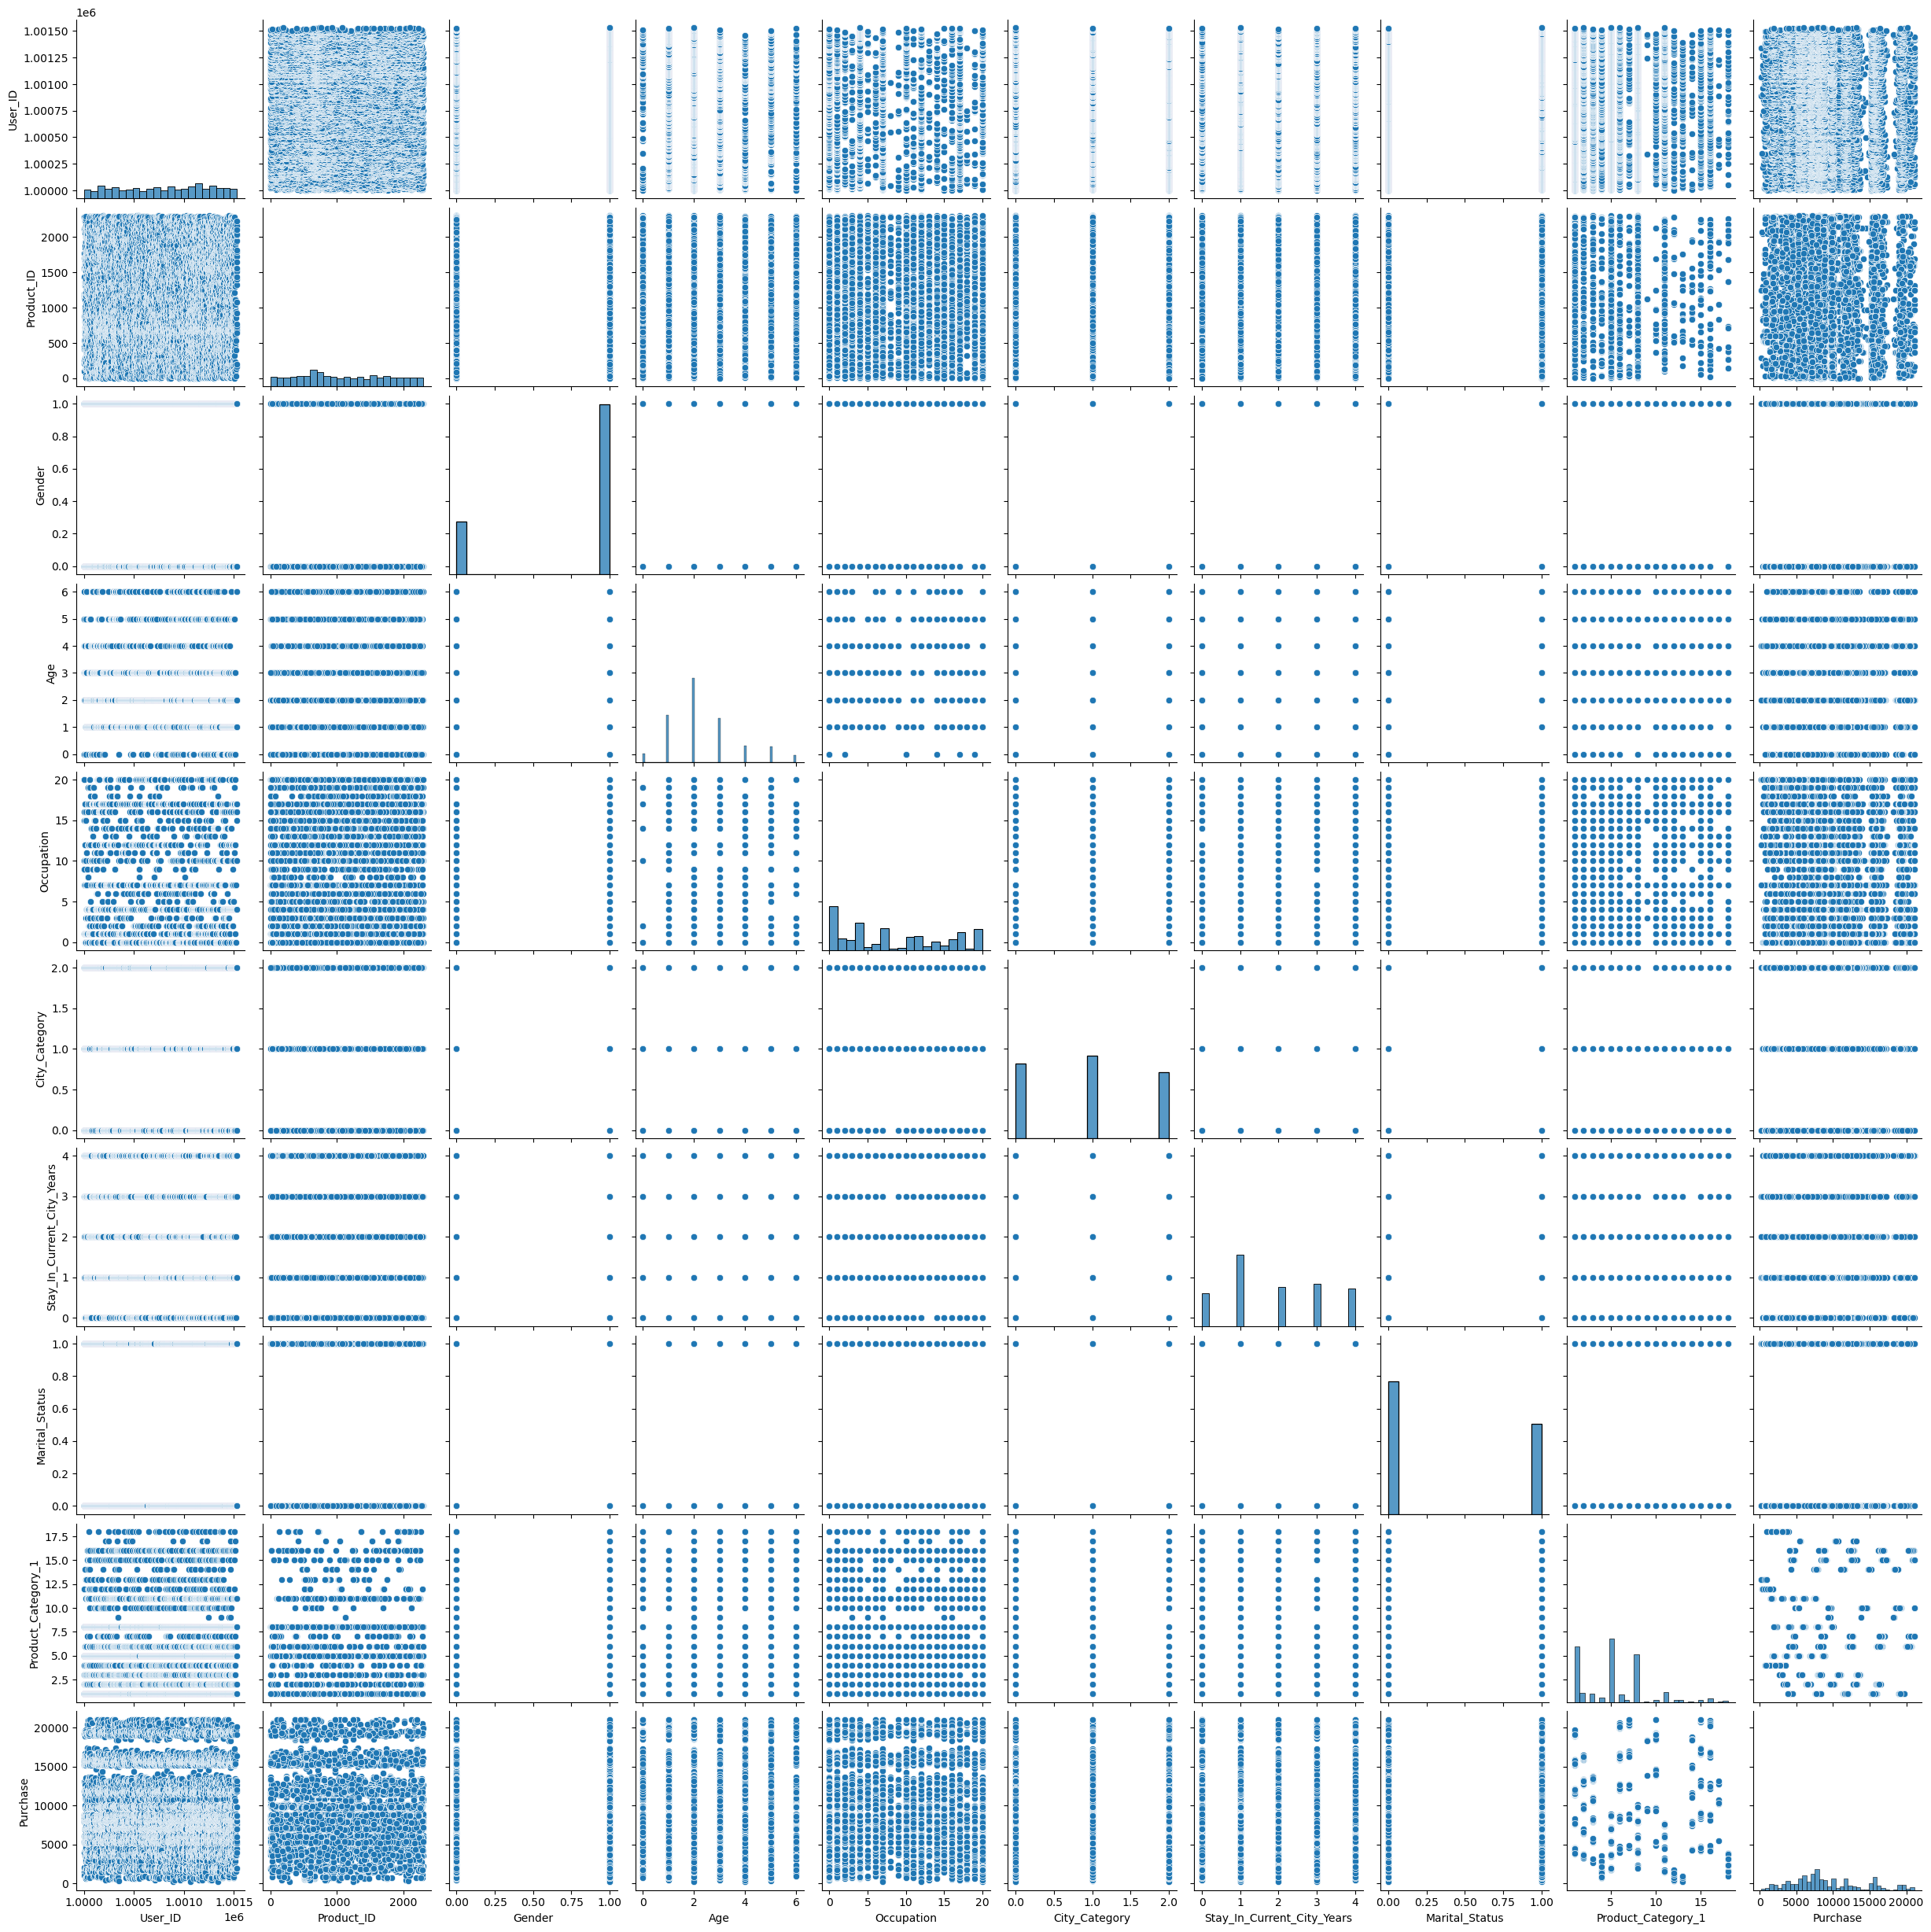

In [255]:
print(sns.pairplot(data = df))

In [256]:
X = df.drop(columns=["Purchase"])
Y = df['Purchase'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 10)

print("Training Data Shape (X_train):", X_train.shape)
print("Testing Data Shape (X_test):", X_test.shape)
print("Training Labels Shape (Y_train):", Y_train.shape)
print("Testing Labels Shape (Y_test):", Y_test.shape)

Training Data Shape (X_train): (8000, 9)
Testing Data Shape (X_test): (2000, 9)
Training Labels Shape (Y_train): (8000,)
Testing Labels Shape (Y_test): (2000,)
